In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# ---- below potentially in model.py file
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay


import wrangle_telco as w


In [2]:
# here is where we call on the file and function and save it back to df
# acquiring data
telco_df = w.get_telco_data()

In [3]:
telco_df

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,1,2,9987-LUTYD,Female,0,No,No,13,Yes,...,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,1,2,1,9992-RRAMN,Male,0,Yes,No,22,Yes,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,2,1,1,9992-UJOEL,Male,0,No,No,2,Yes,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,2,1,3,9993-LHIEB,Male,0,Yes,Yes,67,Yes,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


In [4]:
# checking for nulls and reviewing dataypes
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [5]:
# customer_id = 4 digits hyphen string
# use slice here maybe?



#### the prepare will take care of all columns below
# change these cloumns to binary

# gender change male female ones & zeros
# partner " "
# dependents " "
# phone service
# tech support 
# streaming tv
# streaming movies
# paperless billing
# churn

# get dummies for 
# multiple_lines 
# online_security
# online_backup
# device_protection
# tech_support
# streaming_tv
# streaming_movies
# contract_type
# internet_service_type
# payment_type 

In [6]:
# verifying data
train.info()

NameError: name 'train' is not defined

In [8]:
train.head().T

,5919,1915,5054,2355,6279
gender,Female,Male,Female,Male,Male
senior_citizen,0,0,0,0,1
partner,No,No,Yes,Yes,No
dependents,No,Yes,Yes,Yes,No
tenure,58,71,35,1,20
phone_service,Yes,Yes,Yes,Yes,Yes
multiple_lines,Yes,Yes,Yes,No,No
online_security,Yes,Yes,No internet service,No internet service,Yes
online_backup,Yes,Yes,No internet service,No internet service,No
device_protection,Yes,No,No internet service,No internet service,No


In [9]:
#### Preprocessing for modeling

##### dropped non encoded and redundant columns

##### we need to drop the target of churn column ####
########## and make the x and y for each set 

x_train = train.drop(columns=['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn', 'contract_type', 'internet_service_type', 'payment_type', 'churn_encoded', 'multiple_lines_No', 'online_security_No', 'online_backup_No', 'device_protection_No', 'tech_support_No', 'streaming_tv_No', 'streaming_movies_No'])
y_train = train.churn_encoded


x_validate = validate.drop(columns=['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn', 'contract_type', 'internet_service_type', 'payment_type', 'churn_encoded', 'multiple_lines_No', 'online_security_No', 'online_backup_No', 'device_protection_No', 'tech_support_No', 'streaming_tv_No', 'streaming_movies_No'])
y_validate = validate.churn_encoded

x_test = test.drop(columns=['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn', 'contract_type', 'internet_service_type', 'payment_type', 'churn_encoded', 'multiple_lines_No', 'online_security_No', 'online_backup_No', 'device_protection_No', 'tech_support_No', 'streaming_tv_No', 'streaming_movies_No'])
y_test = test.churn_encoded


In [10]:
telco_df.churn.value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: churn, dtype: float64

In [10]:
# 2891 not churned customer 
# 1046 have churned (discontinued- services)
y_train.value_counts()


0    2891
1    1046
Name: churn_encoded, dtype: int64

Text(0.5, 1.0, 'Customer churn based on Contract Type')

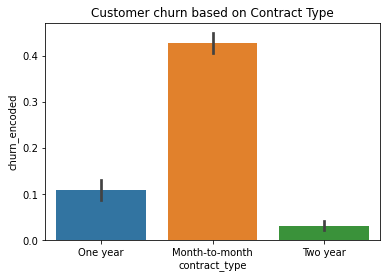

In [146]:
# bar plot 'tip' by gender. Shows mean for each category instead with CI

sns.barplot(data = train, y = 'churn_encoded', x = 'contract_type')
plt.title('Customer churn based on Contract Type')
#churn_encoded1 = train.churn_encoded.mean()
#plt.axhline(churn_encoded1, label = 'Customer Churn Rate')
#sns.barplot(data = train, y = 'churn_encoded1', x = 'contract_type')



In [11]:
# y is our basline churn_encoded column
y_train.shape, y_validate.shape, y_test.shape

((3937,), (1688,), (1407,))

In [12]:
##### take a look at the data
x_train.shape, x_validate.shape, x_test.shape

((3937, 33), (1688, 33), (1407, 33))

In [13]:
# The mode is a great baseline
# applying a dot mode() to the y_train get us baseline of churn_encoded column
# baseline is all things equal no customers churn 
baseline = y_train.mode()

In [14]:
baseline

0    0
Name: churn_encoded, dtype: int64

In [15]:
# Produce a boolean array with True representing a match between 
# the baseline prediction and reality

# the reality is y = 0
matches_baseline_prediction = (y_train == 0)

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.73


In [16]:
# Make the model = DECISION TREE
## max_depth=3 default and random state to replicate results
tree1 = DecisionTreeClassifier(max_depth=3, random_state=123)

# Fit the model (on train and only train)
#           .fit 
# which means over write tree1
tree1 = tree1.fit(x_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
#                   .preditct
y_predictions = tree1.predict(x_train)

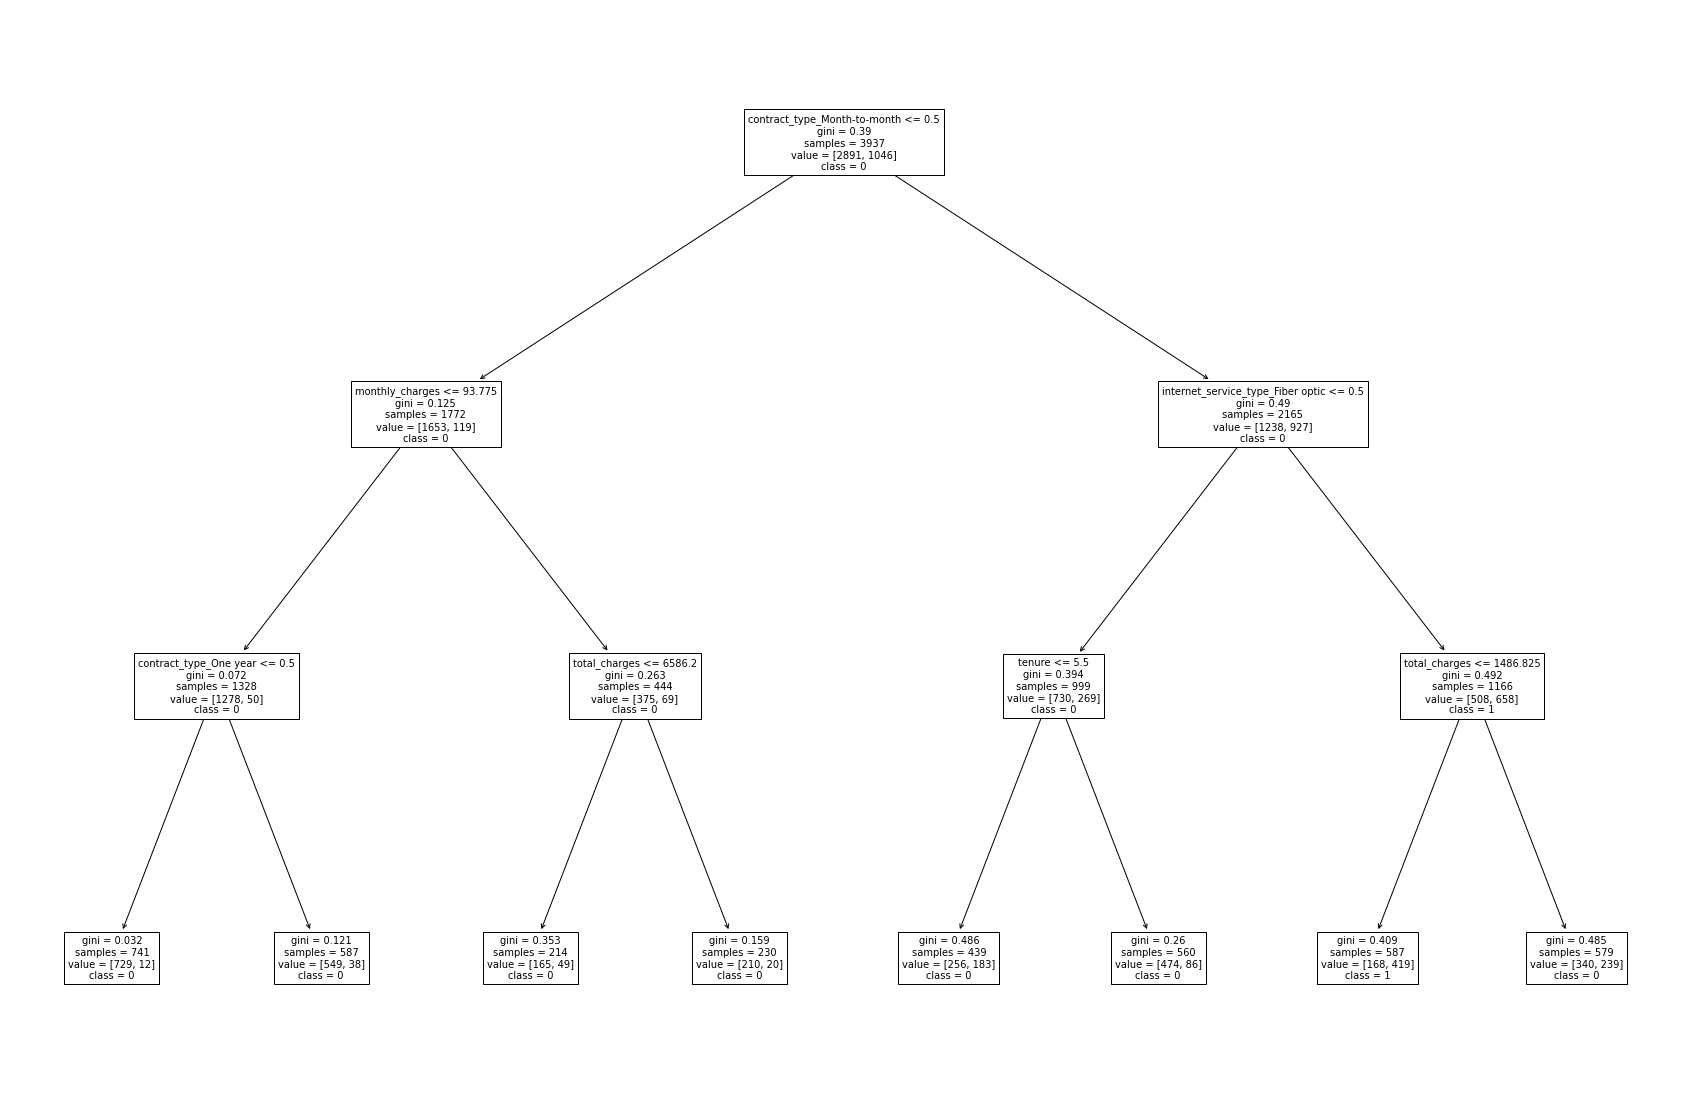

In [17]:
plt.figure(figsize=(30, 20))

##### plot_tree ( the model, feature_names = x_train.columns, class_names are the list 
#                                                              of the 1 & 0's)
plot_tree(tree1, feature_names=x_train.columns, class_names=['0','1'])
#### to show us the viz
plt.show()

In [18]:
# printing the string and after : is 
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree1.score(x_train, y_train)))
# .format looks for curly braces (similiar to f' strings) (: = start of formatting 
# the output) (.2f=rounds) 

Accuracy of Decision Tree classifier on training set: 0.80


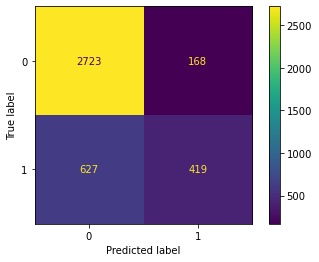

In [19]:
# calling the tree1 x and y trains into confusion matrix viz
plot_confusion_matrix(tree1, x_train, y_train)

In [20]:
##### calling classification_report function on our baseline train and predictions
print(classification_report(y_train, y_predictions))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      2891
           1       0.71      0.40      0.51      1046

    accuracy                           0.80      3937
   macro avg       0.76      0.67      0.69      3937
weighted avg       0.79      0.80      0.78      3937



In [21]:
##### Produce the classification report on the actual y values and this 
#####        model's predicted y values           output_dict=True
report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of 1 depth")
pd.DataFrame(report)

Tree of 1 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.812836,0.713799,0.79807,0.763317,0.786523
recall,0.941889,0.400574,0.79807,0.671231,0.798070
f1-score,0.872617,0.513166,0.79807,0.692891,0.777116
support,2891.000000,1046.000000,0.79807,3937.000000,3937.000000


In [22]:
# could make loopy models here

In [23]:
# Make the model = RANDOM FOREST TREE
# using the default hyperparameters
rf = RandomForestClassifier(max_depth =None, 
                            min_samples_leaf = 1, 
                            random_state=123)

In [24]:
# fit the model to the train data
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=123)

In [25]:
# adjust later to avoid overfitting
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(x_train, y_train)))

Accuracy of random forest classifier on training set: 1.00


In [26]:
cm = confusion_matrix(y_train, y_predictions)
print(cm)

[[2723  168]
 [ 627  419]]


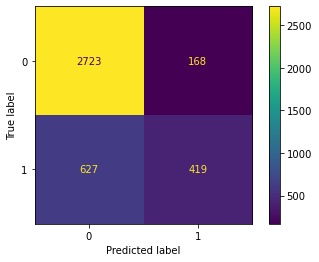

In [27]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)

disp.plot()
plt.show()

In [28]:

print(classification_report(y_train, y_predictions))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      2891
           1       0.71      0.40      0.51      1046

    accuracy                           0.80      3937
   macro avg       0.76      0.67      0.69      3937
weighted avg       0.79      0.80      0.78      3937



In [29]:
### Classification Report

TN, FP, FN, TP = confusion_matrix(y_train, y_predictions).ravel()
ALL = TP + TN + FP + FN



accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")



Accuracy: 0.7980695961391923
True Positive Rate: 0.4005736137667304
False Positive Rate: 0.05811138014527845
True Negative Rate: 0.9418886198547215
False Negative Rate: 0.5994263862332696
Precision: 0.7137989778534923
Recall: 0.4005736137667304
F1 Score: 0.51316595223515
Support (0): 1046
Support (1): 2891


In [30]:
# Make the model = KNN
# using the default hyperparameters
# creating KNN model

# weights = ['uniform', 'density']
knn1 = KNeighborsClassifier(n_neighbors=5, weights='uniform')


In [31]:
# fit the model
knn1.fit(x_train, y_train)

KNeighborsClassifier()

In [32]:
# make predictions
#.  .predict(feed x_train)
# return [:5] is just like .head()
y_pred = knn1.predict(x_train)
y_pred[:5]

array([0, 0, 0, 1, 0])

In [33]:
# ESTIMATE PROBABILITY
# 
y_pred_proba = knn1.predict_proba(x_train)
#y_pred_proba[:5]

In [34]:
# compute for accuracy

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn1.score(x_train, y_train)))

Accuracy of KNN classifier on training set: 0.83


In [35]:
# create confu matrix

# which gives us the key to TN FP FN TP
print(confusion_matrix(y_train, y_pred))

[[2666  225]
 [ 435  611]]


In [36]:
### Classification Report

#                 the .ravel take the array as given
# this needs to stay in theis order left to right
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()
ALL = TP + TN + FP + FN



accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")



Accuracy: 0.8323596647193294
True Positive Rate: 0.5841300191204589
False Positive Rate: 0.07782774126599792
True Negative Rate: 0.9221722587340021
False Negative Rate: 0.41586998087954113
Precision: 0.7308612440191388
Recall: 0.5841300191204589
F1 Score: 0.6493092454835282
Support (0): 1046
Support (1): 2891


In [37]:
# Make the model = Logistic Regression
# using the default hyperparameters
# creating logistic regression model
# Define the logistic regression model
logit = LogisticRegression(C=1, random_state=123)

In [38]:
x_train.head().T

,5919,1915,5054,2355,6279
senior_citizen,0.0,0.00,0.00,0.0,1.0
tenure,58.0,71.00,35.00,1.0,20.0
monthly_charges,71.1,85.45,25.75,19.2,54.0
total_charges,4299.2,6028.95,882.55,19.2,1055.9
gender_encoded,1.0,0.00,1.00,0.0,0.0
partner_encoded,0.0,0.00,1.00,1.0,0.0
dependents_encoded,0.0,1.00,1.00,1.0,0.0
phone_service_encoded,1.0,1.00,1.00,1.0,1.0
paperless_billing_encoded,1.0,1.00,1.00,0.0,0.0
multiple_lines_No phone service,0.0,0.00,0.00,0.0,0.0


In [39]:
# Create the logistic regression
logit = LogisticRegression(random_state=123)

# specify the features we're using
features_model1 = ['contract_type_Month-to-month', 'contract_type_One year', 'contract_type_Two year']

# Fit a model using only these specified features
#  fit the model on train data
logit.fit(x_train[features_model1], y_train)

# Since we .fit on a subset, we .predict on that same subset of features
# now use the model to make predictions
y_pred = logit.predict(x_train[features_model1])


print("Baseline is", round(baseline_accuracy, 2))
print("Logistic Regression using contract types of month to month, 1year, and 2year")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(x_train[features_model1], y_train)))

Baseline is 0.73
Logistic Regression using contract types of month to month, 1year, and 2year
Accuracy of Logistic Regression classifier on training set: 0.73


In [40]:
# look at predicted probabilites for first 10 observations
logit.predict_proba(x_train[features_model1])[:10]

array([[0.89058476, 0.10941524],
       [0.89058476, 0.10941524],
       [0.57257763, 0.42742237],
       [0.57257763, 0.42742237],
       [0.89058476, 0.10941524],
       [0.57257763, 0.42742237],
       [0.96712817, 0.03287183],
       [0.57257763, 0.42742237],
       [0.57257763, 0.42742237],
       [0.96712817, 0.03287183]])

In [41]:
# View raw probabilities (output from the model)

y_pred_proba = logit.predict_proba(x_train[features_model1])
y_pred_proba = pd.DataFrame(y_pred_proba, columns = ['No Churn', 'Yes Churn'])
y_pred_proba.head().round(3)

,No Churn,Yes Churn
0,0.891,0.109
1,0.891,0.109
2,0.573,0.427
3,0.573,0.427
4,0.891,0.109


In [42]:
# classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      2891
           1       0.00      0.00      0.00      1046

    accuracy                           0.73      3937
   macro avg       0.37      0.50      0.42      3937
weighted avg       0.54      0.73      0.62      3937



In [43]:
# All features, all default hyperparameters
logit2 = LogisticRegression(random_state=123)
##          all features on x axis
logit2.fit(x_train, y_train)

y_pred = logit2.predict(x_train)

print("Model trained on all features")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit2.score(x_train, y_train)))

Model trained on all features
Accuracy of Logistic Regression classifier on training set: 0.80


In [129]:
### CSV test 

In [113]:
# final model running on test sets
y_pred_test = logit2.predict(x_test)

print("Model trained on all features")
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'
     .format(logit2.score(x_test, y_test)))
y_proba_test = logit2.predict_proba(x_test)

Model trained on all features
Accuracy of Logistic Regression classifier on test set: 0.80


In [114]:
y_pred_test

array([0, 0, 1, ..., 0, 0, 0])

In [115]:
y_proba_test

array([[0.9759361 , 0.0240639 ],
       [0.98092101, 0.01907899],
       [0.45281701, 0.54718299],
       ...,
       [0.89740627, 0.10259373],
       [0.88543658, 0.11456342],
       [0.80149605, 0.19850395]])

In [125]:
final_pred_df = pd.DataFrame(y_pred_test)

In [133]:
final_prob_df = pd.DataFrame(y_proba_test)
final_prob_df.head()

,0,1
0,0.975936,0.024064
1,0.980921,0.019079
2,0.452817,0.547183
3,0.536847,0.463153
4,0.902018,0.097982


In [134]:
final_prob_df = final_prob_df.drop(columns=0)

In [135]:
# concat this on to that drop O keep churn 1

final_df = pd.concat([final_pred_df, final_prob_df], axis=1)




In [140]:
final_df = pd.concat([final_pred_df, final_prob_df], axis=1)

In [147]:
##### It WILL WORK read to csv
final_final = pd.concat([final_df, customer_id], axis=1)

NameError: name 'customer_id' is not defined

#### Readme Below

### 1. Form hypothesis

* $H_0$: There is **no** association between churn and contract type month to month
* $H_a$: There is association between churn and contract type month to month

In [45]:
alpha = 0.05

In [47]:
# no = 0 yes churn = 1
train.churn_encoded.value_counts()

0    2891
1    1046
Name: churn_encoded, dtype: int64

In [49]:
train.contract_type.value_counts()

Month-to-month    2165
Two year           957
One year           815
Name: contract_type, dtype: int64

### make contingency table

In [50]:
observed = pd.crosstab(train.churn_encoded, train.contract_type)
observed

contract_type,Month-to-month,One year,Two year
churn_encoded,,,
0,1238,726,927
1,927,89,30


### 3. use stats.chi2_contingency

In [51]:
stats.chi2_contingency(observed)

(664.6572486352288,
 4.693667062132269e-145,
 2,
 array([[1589.79298959,  598.46710693,  702.73990348],
        [ 575.20701041,  216.53289307,  254.26009652]]))

In [52]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [53]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[1238  726  927]
 [ 927   89   30]]

Expected
[[1589  598  702]
 [ 575  216  254]]

----
chi^2 = 664.6572
p     = 0.0000


In [54]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


In [55]:

train.churn_encoded.value_counts(normalize=True)

0    0.734315
1    0.265685
Name: churn_encoded, dtype: float64

In [57]:

train.contract_type.value_counts(normalize=True)

Month-to-month    0.549911
Two year          0.243078
One year          0.207010
Name: contract_type, dtype: float64

In [58]:
pd.crosstab(train.churn_encoded, train.contract_type, normalize='all')

contract_type,Month-to-month,One year,Two year
churn_encoded,,,
0,0.314453,0.184404,0.235458
1,0.235458,0.022606,0.007620


### 1. Form hypothesis

* $H_0$: There is **no** association between churn and internet service type
* $H_a$: There is association between churn and internet service type

In [64]:
train.internet_service_type.value_counts()

Fiber optic    1722
DSL            1348
None            867
Name: internet_service_type, dtype: int64

In [65]:
observed = pd.crosstab(train.churn_encoded, train.internet_service_type)
observed

internet_service_type,DSL,Fiber optic,None
churn_encoded,,,
0,1101,987,803
1,247,735,64


In [66]:
stats.chi2_contingency(observed)

(439.76614796987747,
 3.2062272759526154e-96,
 2,
 array([[ 989.85725171, 1264.49123698,  636.6515113 ],
        [ 358.14274829,  457.50876302,  230.3484887 ]]))

In [67]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [68]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[1101  987  803]
 [ 247  735   64]]

Expected
[[ 989 1264  636]
 [ 358  457  230]]

----
chi^2 = 439.7661
p     = 0.0000


In [69]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


In [70]:
train.internet_service_type.value_counts(normalize=True)

Fiber optic    0.437389
DSL            0.342393
None           0.220218
Name: internet_service_type, dtype: float64

In [73]:
pd.crosstab(train.churn_encoded, train.internet_service_type, normalize='all')

internet_service_type,DSL,Fiber optic,None
churn_encoded,,,
0,0.279655,0.250699,0.203962
1,0.062738,0.186690,0.016256


In [74]:
## does customer gender have any relationship with churn?

In [87]:
train.gender.value_counts()

Male      1976
Female    1961
Name: gender, dtype: int64

In [88]:
observed = pd.crosstab(train.churn_encoded, train.gender)
observed

gender,Female,Male
churn_encoded,,
0,1440,1451
1,521,525


In [89]:
stats.chi2_contingency(observed)

(0.0,
 1.0,
 1,
 array([[1439.99263399, 1451.00736601],
        [ 521.00736601,  524.99263399]]))

In [90]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [91]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[1440 1451]
 [ 521  525]]

Expected
[[1439 1451]
 [ 521  524]]

----
chi^2 = 0.0000
p     = 1.0000


In [92]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We fail to reject the null hypothesis


In [93]:
# Will phone service have any relationship with churn?

In [106]:
train.phone_service_encoded.value_counts()

1    3564
0     373
Name: phone_service_encoded, dtype: int64

In [107]:
observed = pd.crosstab(train.churn_encoded, train.phone_service_encoded)
observed

phone_service_encoded,0,1
churn_encoded,,
0,282,2609
1,91,955


In [108]:
stats.chi2_contingency(observed)

(0.8768692947966348,
 0.3490605904235855,
 1,
 array([[ 273.8996698, 2617.1003302],
        [  99.1003302,  946.8996698]]))

In [109]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [110]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[ 282 2609]
 [  91  955]]

Expected
[[ 273 2617]
 [  99  946]]

----
chi^2 = 0.8769
p     = 0.3491


In [111]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We fail to reject the null hypothesis


In [11]:
# MAKE PREDICTIONS

y_pred = rf.predict(x_train)

# ESTIMATE PROBABILITY 
y_pred_proba = rf.predict_proba(x_train)

# PREDICTIONS ON TEST MODEL

y_pred_test = rf.predict(x_test)

y_proba_test = rf.predict_proba(x_test)

# 
y_pred_proba = pd.DataFrame(y_pred_proba, columns = ['No Churn', 'Yes Churn'])
y_pred_proba.head().round(3)

NameError: name 'rf' is not defined

In [12]:
final_pred_df = pd.DataFrame(y_pred_test)

NameError: name 'y_pred_test' is not defined

In [ ]:
final_prob_df = pd.DataFrame(y_proba_test)
final_prob_df.head()

In [ ]:
final_prob_df = final_prob_df.drop(columns=0)

In [ ]:
final_df = pd.concat([final_pred_df, final_prob_df], axis=1)

In [ ]:
final_df = pd.concat([final_pred_df, final_prob_df], axis=1)

In [ ]:
final_final = pd.concat([final_df, customer_id], axis=1)

In [13]:
#
customer_id

NameError: name 'customer_id' is not defined